In [2]:
import time

# coding: utf-8
import requests

def get_candle_sticks(pair: str, after: str = '', before: str = '', interval: str = '7d'):
    host = "https://api.gateio.ws"
    prefix = "/api/v4"
    headers = {'Accept': 'application/json', 'Content-Type': 'application/json'}

    url = '/spot/candlesticks'
    query_param = f'currency_pair={pair}&interval={interval}&limit=1000'
    if after != '':
        query_param += f'&from={after}'
    if before != '':
        query_param += f'&to={before}'

    r = requests.request('GET', host + prefix + url + "?" + query_param, headers=headers)
    return r.json()

In [3]:
get_candle_sticks('BTC_USDT')

[['1364169600',
  '7620.89189800',
  '93.033',
  '93.74999',
  '91',
  '92.5',
  '54.82005300'],
 ['1364774400',
  '146851.58284800',
  '162.304',
  '164.75',
  '92.49999',
  '93.25',
  '792.10385200'],
 ['1365379200',
  '455053.76133800',
  '90.171',
  '290',
  '1.06',
  '163.9',
  '2292.89387600'],
 ['1365984000',
  '278191.23633600',
  '117.618',
  '142',
  '0.01',
  '89.86',
  '1952.15630100'],
 ['1366588800',
  '354724.52135800',
  '135.28',
  '169.13',
  '13',
  '119.96',
  '1677.97987600'],
 ['1367193600',
  '424211.66527000',
  '116.57',
  '148.5',
  '80',
  '134.63',
  '2410.63874900'],
 ['1367798400',
  '164042.14119800',
  '114.3',
  '124.3',
  '98',
  '116.587',
  '965.15010100'],
 ['1368403200',
  '106639.25306700',
  '118.25',
  '122',
  '103.45',
  '115.97',
  '624.15373400'],
 ['1369008000',
  '74979.22645900',
  '130.24',
  '133',
  '116',
  '118.23',
  '404.12848300'],
 ['1369612800',
  '99966.66188800',
  '123.8',
  '140.68',
  '117',
  '130.27',
  '522.45045900'],
 

In [4]:
def get_all_pairs():
    host = "https://api.gateio.ws"
    prefix = "/api/v4"
    headers = {'Accept': 'application/json', 'Content-Type': 'application/json'}

    url = '/spot/currency_pairs'
    query_param = ''
    r = requests.request('GET', host + prefix + url, headers=headers)
    return r.json()

In [5]:
pairs = get_all_pairs()

In [19]:
import re

In [72]:
def filter_usdt_pairs(all_pairs):
    usdt_pairs = {}
    eft_symbols = ['3S_', '3L_', '5S_', '5L_']
    for pair in pairs:
        is_etf = False
        if 'USDT' in pair['id']:
            for eft_symbol in eft_symbols:
                if eft_symbol in pair['id']:
                    is_etf = True
            if not is_etf:
                usdt_pairs[pair['id']] = pair
    return usdt_pairs

In [86]:
gate_usdt_pairs = filter_usdt_pairs(pairs)


## fetch top coins

In [84]:
listing_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD',
  'aux': 'num_market_pairs,cmc_rank,date_added,tags,platform,max_supply,circulating_supply,total_supply,market_cap_by_total_supply,volume_24h_reported,volume_7d,volume_7d_reported,volume_30d,volume_30d_reported,is_market_cap_included_in_calc',
  'sort':'market_cap_strict'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a854f954-9be5-4b24-8415-fa28f686cff1',
}
coins = requests.get(listing_url, params=parameters, headers=headers).json()

# top 500 market cap
top_coins = {}
for coin in coins['data']:
    top_coins[coin['symbol']] = coin
    if len(top_coins) == 500:
        break

In [85]:
len(top_coins.keys())

500

In [90]:
gate_usdt_pairs_top500_marketcap = {pair: gate_usdt_pairs[pair] for pair in gate_usdt_pairs if pair.split('_')[0] in top_coins}

In [93]:
gate_usdt_pairs_top500_marketcap.keys()

dict_keys(['1INCH_USDT', 'AAVE_USDT', 'ABBC_USDT', 'ACA_USDT', 'ACH_USDT', 'ACS_USDT', 'ADA_USDT', 'AERGO_USDT', 'AGIX_USDT', 'AGLD_USDT', 'AKT_USDT', 'ALGO_USDT', 'ALICE_USDT', 'ALI_USDT', 'ALPHA_USDT', 'AMPL_USDT', 'AMP_USDT', 'ANKR_USDT', 'ANT_USDT', 'AOG_USDT', 'APE_USDT', 'API3_USDT', 'APT_USDT', 'AQT_USDT', 'ARB_USDT', 'ARKM_USDT', 'ARK_USDT', 'ARPA_USDT', 'AR_USDT', 'ASD_USDT', 'ASTR_USDT', 'ATA_USDT', 'ATOM_USDT', 'AUCTION_USDT', 'AUDIO_USDT', 'AURA_USDT', 'AVAX_USDT', 'AXL_USDT', 'AXS_USDT', 'AZERO_USDT', 'BADGER_USDT', 'BAKE_USDT', 'BAL_USDT', 'BAND_USDT', 'BAT_USDT', 'BCH_USDT', 'BDX_USDT', 'BEL_USDT', 'BFC_USDT', 'BICO_USDT', 'BLUR_USDT', 'BLZ_USDT', 'BNB_USDT', 'BNT_USDT', 'BNX_USDT', 'BOND_USDT', 'BONE_USDT', 'BONK_USDT', 'BORA_USDT', 'BRISE_USDT', 'BSV_USDT', 'BSW_USDT', 'BTC_USDT', 'BTG_USDT', 'BTM_USDT', 'BTRST_USDT', 'BTT_USDT', 'BUSD_USDT', 'BXC_USDT', 'C98_USDT', 'CAKE_USDT', 'CBK_USDT', 'CEEK_USDT', 'CELO_USDT', 'CELR_USDT', 'CEL_USDT', 'CFG_USDT', 'CFX_USDT', 'CHE

## fetch historical prices

In [99]:
import time

In [106]:
all_pairs_candle_sticks = {}
for pair in gate_usdt_pairs_top500_marketcap:
    if pair not in all_pairs_candle_sticks.keys():
        try:
            all_pairs_candle_sticks[pair] = get_candle_sticks(pair)
            print('fethcing:', pair)
        except:
            print('fethcing:', pair, 'failed, retry')
            time.sleep(10)

fethcing: 1INCH_USDT
fethcing: AAVE_USDT
fethcing: ABBC_USDT
fethcing: ACA_USDT
fethcing: ACH_USDT
fethcing: ACS_USDT
fethcing: ADA_USDT
fethcing: AERGO_USDT
fethcing: AGIX_USDT
fethcing: AGLD_USDT
fethcing: AKT_USDT
fethcing: ALGO_USDT
fethcing: ALICE_USDT
fethcing: ALI_USDT
fethcing: ALPHA_USDT
fethcing: AMPL_USDT
fethcing: AMP_USDT
fethcing: ANKR_USDT
fethcing: ANT_USDT
fethcing: AOG_USDT
fethcing: APE_USDT
fethcing: API3_USDT
fethcing: APT_USDT
fethcing: AQT_USDT
fethcing: ARB_USDT
fethcing: ARKM_USDT
fethcing: ARK_USDT
fethcing: ARPA_USDT
fethcing: AR_USDT
fethcing: ASD_USDT
fethcing: ASTR_USDT
fethcing: ATA_USDT
fethcing: ATOM_USDT
fethcing: AUCTION_USDT
fethcing: AUDIO_USDT
fethcing: AURA_USDT
fethcing: AVAX_USDT
fethcing: AXL_USDT
fethcing: AXS_USDT
fethcing: AZERO_USDT
fethcing: BADGER_USDT
fethcing: BAKE_USDT
fethcing: BAL_USDT
fethcing: BAND_USDT
fethcing: BAT_USDT
fethcing: BCH_USDT
fethcing: BDX_USDT
fethcing: BEL_USDT
fethcing: BFC_USDT
fethcing: BICO_USDT
fethcing: BLUR_

In [112]:
all_pairs_candle_sticks['BTC_USDT'][0]

['1364169600',
 '7620.89189800',
 '93.033',
 '93.74999',
 '91',
 '92.5',
 '54.82005300']

In [108]:
import json
with open('gate_data_week.json', 'w') as f:
    json.dump(all_pairs_candle_sticks, f)

## check duplication

In [109]:
def dedup(prices):
    ts = set()
    for idx, closing_price in enumerate(prices):
        if closing_price[0] not in ts:
            ts.add(closing_price[0])
        else:
            print(idx, closing_price)
            print(idx-1, prices[idx-1])

In [111]:
for pair_data in all_pairs_candle_sticks:
    dedup(all_pairs_candle_sticks[pair_data])

## map BTC price for comparison

In [120]:
btc_time_candle_stick_map = {candle_stick[0]: candle_stick for candle_stick in all_pairs_candle_sticks['BTC_USDT']}

In [122]:
btc_time_candle_stick_map

{'1364169600': ['1364169600',
  '7620.89189800',
  '93.033',
  '93.74999',
  '91',
  '92.5',
  '54.82005300'],
 '1364774400': ['1364774400',
  '146851.58284800',
  '162.304',
  '164.75',
  '92.49999',
  '93.25',
  '792.10385200'],
 '1365379200': ['1365379200',
  '455053.76133800',
  '90.171',
  '290',
  '1.06',
  '163.9',
  '2292.89387600'],
 '1365984000': ['1365984000',
  '278191.23633600',
  '117.618',
  '142',
  '0.01',
  '89.86',
  '1952.15630100'],
 '1366588800': ['1366588800',
  '354724.52135800',
  '135.28',
  '169.13',
  '13',
  '119.96',
  '1677.97987600'],
 '1367193600': ['1367193600',
  '424211.66527000',
  '116.57',
  '148.5',
  '80',
  '134.63',
  '2410.63874900'],
 '1367798400': ['1367798400',
  '164042.14119800',
  '114.3',
  '124.3',
  '98',
  '116.587',
  '965.15010100'],
 '1368403200': ['1368403200',
  '106639.25306700',
  '118.25',
  '122',
  '103.45',
  '115.97',
  '624.15373400'],
 '1369008000': ['1369008000',
  '74979.22645900',
  '130.24',
  '133',
  '116',
  '11

## calculate alt/btc exchange rate over time

In [126]:
alt_btc_rates = {}
for pair in all_pairs_candle_sticks:
    relevant_ohlcs = []
    for candle_stick in all_pairs_candle_sticks[pair]:
        timestamp = candle_stick[0]
        relevent_btc_candle_stick = btc_time_candle_stick_map[timestamp]
        relevant_ohlc = [timestamp, float(candle_stick[2])/float(relevent_btc_candle_stick[2]), \
                         float(candle_stick[3])/float(relevent_btc_candle_stick[3]), \
                         float(candle_stick[4])/float(relevent_btc_candle_stick[4]), \
                         float(candle_stick[5])/float(relevent_btc_candle_stick[5])]
        relevant_ohlcs.append(relevant_ohlc)
    alt_btc_rates[pair] = relevant_ohlcs

In [128]:
alt_btc_rates['ETH_USDT']

[['1457308800',
  0.035098453395488866,
  0.03558545797922568,
  0.025147567931060245,
  0.025502142308740126],
 ['1457913600',
  0.0249677811550152,
  0.03554446029481693,
  0.02068931292027493,
  0.035269417475728156],
 ['1458518400',
  0.024351834518906774,
  0.028932714617169376,
  0.02497536945812808,
  0.024875246464302232],
 ['1459123200',
  0.027603423680456488,
  0.0287389892287203,
  0.025583626479053406,
  0.024444236439369122],
 ['1459728000',
  0.02119766448305326,
  0.02744705882352941,
  0.018252427184466017,
  0.02757785220551557],
 ['1460332800',
  0.02167977410095447,
  0.025016641035646242,
  0.016368194842406876,
  0.021195053640938006],
 ['1460937600',
  0.017581098008725326,
  0.0205380760876578,
  0.018123417424739757,
  0.02167977410095447],
 ['1461542400',
  0.019487708097803196,
  0.019848169981763433,
  0.016368965517241377,
  0.01764077439406039],
 ['1462147200',
  0.020679757322721638,
  0.022103004291845495,
  0.01980045871559633,
  0.01957350594076964],
 

In [139]:
max(alt_btc_rates['ETH_USDT'], key = lambda x: x[1])

['1497225600',
 0.14003371598298145,
 0.13915670785227197,
 0.1295210166177908,
 0.11441404654961208]

In [ ]:


  
# line 1 points 
x1 = [1,2,3] 
y1 = [2,4,1] 
# plotting the line 1 points  
plt.plot(x1, y1, label = "line 1") 
  
# line 2 points 
x2 = [1,2,3] 
y2 = [4,1,3] 
# plotting the line 2 points  
plt.plot(x2, y2, label = "line 2") 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Two lines on same graph!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [160]:
def analyze_alt_btc_rates(alt_btc_rates):
    report = {}
    for pair in alt_btc_rates:
        if len(alt_btc_rates[pair]) > 0:
            exchange_rate_ath = max(alt_btc_rates[pair], key = lambda x: x[1])
            exchange_rate_atl = min(alt_btc_rates[pair], key = lambda x: x[1])
            start_rate = alt_btc_rates[pair][0]
            current_rate = alt_btc_rates[pair][-1]
            report[pair] = {'all_time_high_rate': exchange_rate_ath, 'start_rate':  start_rate,\
                        'current_rate': current_rate, 'all_time_low_rate': exchange_rate_atl,\
                        'all_time_high_since_start': int(exchange_rate_ath[0]) - int(start_rate[0]),\
                        'time_traded': int(current_rate[0]) - int(start_rate[0]),\
                        'all_time_high_from_current': int(current_rate[0]) - int(exchange_rate_ath[0]),\
                        'all_time_low_from_current': int(current_rate[0]) - int(exchange_rate_atl[0])}
            
        
    return report
        

In [166]:
alt_btc_rates_analysis = analyze_alt_btc_rates(alt_btc_rates)

In [198]:
pairs_all_time_high_since_start = [[pair, alt_btc_rates_analysis[pair]['all_time_high_since_start']/(365*3600*24), alt_btc_rates_analysis[pair]['time_traded']/(365*3600*24)]\
                                   for pair in alt_btc_rates_analysis if alt_btc_rates_analysis[pair]['time_traded'] > 365*24*3600]

In [199]:
pairs_all_time_high_since_start[:10]

[['1INCH_USDT', 0.0958904109589041, 2.8575342465753426],
 ['AAVE_USDT', 0.32602739726027397, 3.0684931506849313],
 ['ABBC_USDT', 0.019178082191780823, 2.9342465753424656],
 ['ACA_USDT', 0.1917808219178082, 1.7643835616438357],
 ['ACH_USDT', 0.6328767123287671, 2.8767123287671232],
 ['ADA_USDT', 0.038356164383561646, 5.868493150684931],
 ['AERGO_USDT', 1.515068493150685, 2.665753424657534],
 ['AGLD_USDT', 0.0, 2.1671232876712327],
 ['AKT_USDT', 0.4986301369863014, 2.6465753424657534],
 ['ALGO_USDT', 0.0, 4.372602739726028]]

In [205]:
len(pairs_all_time_high_since_start)

350

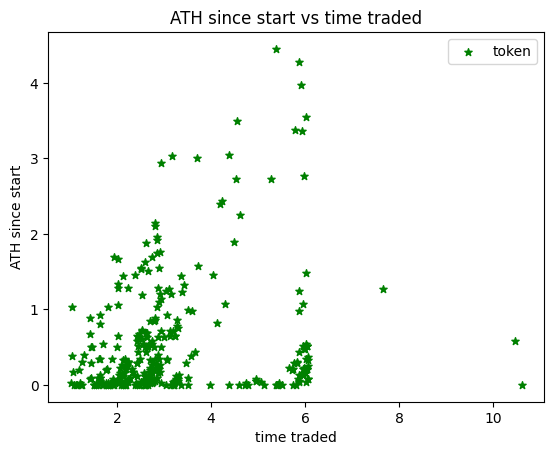

In [207]:
import matplotlib.pyplot as plt 
  
# x-axis values 
x = [pair[2] for pair in pairs_all_time_high_since_start]
# y-axis values 
y = [pair[1] for pair in pairs_all_time_high_since_start]
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "token", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('time traded') 
# frequency label 
plt.ylabel('ATH since start') 
# plot title 
plt.title('ATH since start vs time traded') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [210]:
count_by_time = {'1month': 0, '1year': 0, '2years': 0, '3years': 0, '4years': 0, '>4years':0}
for alh_time in pairs_all_time_high_since_start:
    if alh_time[1] <= 1/12:
        count_by_time['1month'] += 1
    elif  alh_time[1] <= 1:
        count_by_time['1year'] += 1
    elif  alh_time[1] <= 2:
        count_by_time['2years'] += 1        
    elif  alh_time[1] <= 3:
        count_by_time['3years'] += 1    
    elif  alh_time[1] <= 4:
        count_by_time['4years'] += 1 
    else:
        count_by_time['>4years'] += 1 
print(count_by_time)

{'1month': 129, '1year': 161, '2years': 41, '3years': 9, '4years': 8, '>4years': 2}


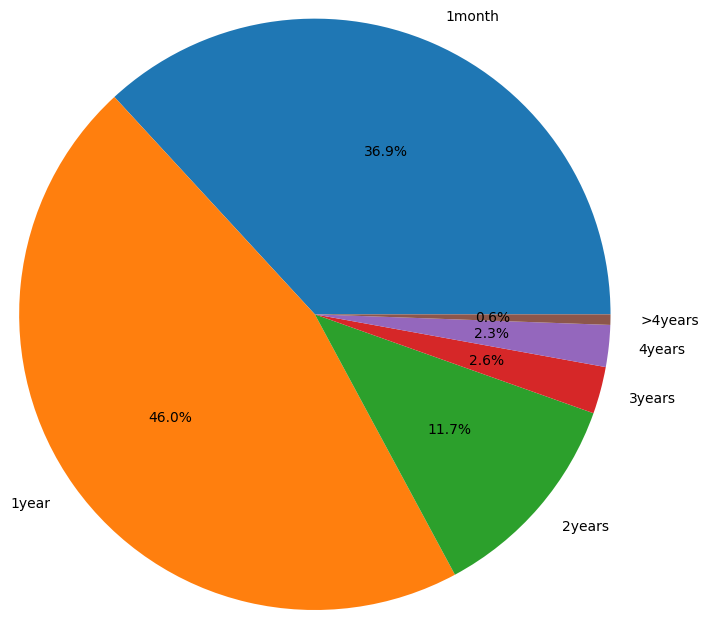

In [219]:
import matplotlib.pyplot as plt 
  
# defining labels 
time_spans = ['1month', '1year', '2years', '3years', '4years', '>4years'] 
  
# portion covered by each label 
slices = [count_by_time[time_span] for time_span in  time_spans]
  
# color for each label 
  
# plotting the pie chart 
plt.pie(slices, labels = time_spans,
        radius = 2, autopct = '%1.1f%%') 
  
# showing the plot 
plt.show() 

In [222]:
count_by_time = {'1month': 0, '1year': 0, '2years': 0, '3years': 0, '4years': 0, '>4years':0}
for alh_time in pairs_all_time_high_since_start:
    if alh_time[2] >= 2:
        if alh_time[1] <= 1/12:
            count_by_time['1month'] += 1
        elif  alh_time[1] <= 1:
            count_by_time['1year'] += 1
        elif  alh_time[1] <= 2:
            count_by_time['2years'] += 1        
        elif  alh_time[1] <= 3:
            count_by_time['3years'] += 1    
        elif  alh_time[1] <= 4:
            count_by_time['4years'] += 1 
        else:
            count_by_time['>4years'] += 1 
print(count_by_time)

{'1month': 95, '1year': 137, '2years': 38, '3years': 9, '4years': 8, '>4years': 2}


In [224]:
sum(count_by_time.values())

289

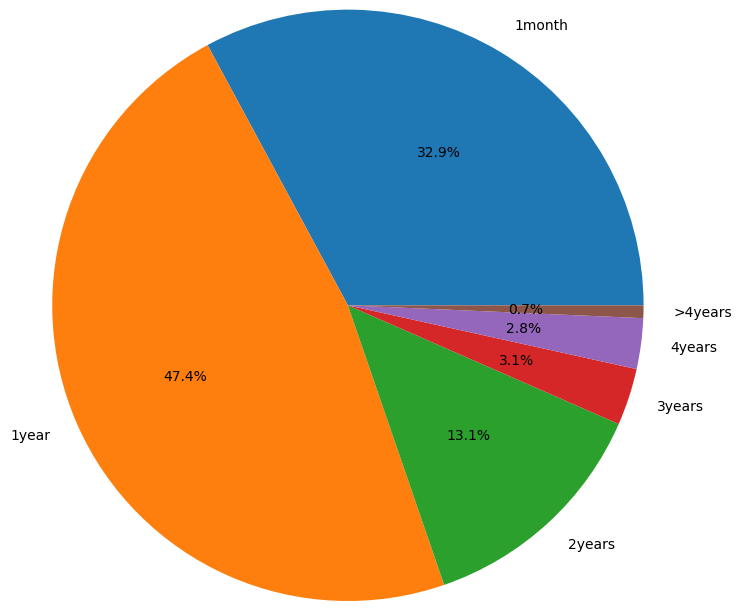

In [225]:
import matplotlib.pyplot as plt 
  
# defining labels 
time_spans = ['1month', '1year', '2years', '3years', '4years', '>4years'] 
  
# portion covered by each label 
slices = [count_by_time[time_span] for time_span in  time_spans]
  
# color for each label 
  
# plotting the pie chart 
plt.pie(slices, labels = time_spans,
        radius = 2, autopct = '%1.1f%%') 
  
# showing the plot 
plt.show() 

In [235]:
pairs_2_years_ath = [ pair_ath for pair_ath in pairs_all_time_high_since_start if pair_ath[1] > 2 ]


In [252]:
sum([pair[2] for pair in pairs_2_years_ath])/ len(pairs_2_years_ath)

4.639077144917088

In [329]:
[pair[0] for pair in pairs_2_years_ath]

['ATOM_USDT',
 'BNB_USDT',
 'DOGE_USDT',
 'FIL_USDT',
 'FTM_USDT',
 'GT_USDT',
 'INJ_USDT',
 'LEO_USDT',
 'LINK_USDT',
 'MANA_USDT',
 'MATIC_USDT',
 'OKB_USDT',
 'ONE_USDT',
 'RIF_USDT',
 'TFUEL_USDT',
 'THETA_USDT',
 'TON_USDT',
 'VET_USDT',
 'WAVES_USDT']

In [258]:
from datetime import datetime
 
print(datetime.fromtimestamp(int(time.time() - 3600*24*365*4.6)))

2019-03-30 22:51:11


In [271]:
pairs_all_time_low_since_start = [[pair, (int(alt_btc_rates_analysis[pair]['all_time_low_rate'][0]) - int(alt_btc_rates_analysis[pair]['start_rate'][0]))/(365*3600*24), \
                                   alt_btc_rates_analysis[pair]['time_traded']/(365*3600*24)]\
                                   for pair in alt_btc_rates_analysis if alt_btc_rates_analysis[pair]['time_traded'] > 365*24*3600]

In [272]:
pairs_all_time_low_since_start

[['1INCH_USDT', 2.8383561643835615, 2.8575342465753426],
 ['AAVE_USDT', 2.684931506849315, 3.0684931506849313],
 ['ABBC_USDT', 2.9342465753424656, 2.9342465753424656],
 ['ACA_USDT', 1.3616438356164384, 1.7643835616438357],
 ['ACH_USDT', 0.5945205479452055, 2.8767123287671232],
 ['ADA_USDT', 1.841095890410959, 5.868493150684931],
 ['AERGO_USDT', 0.30684931506849317, 2.665753424657534],
 ['AGLD_USDT', 0.7671232876712328, 2.1671232876712327],
 ['AKT_USDT', 2.147945205479452, 2.6465753424657534],
 ['ALGO_USDT', 4.353424657534247, 4.372602739726028],
 ['ALICE_USDT', 2.589041095890411, 2.627397260273973],
 ['ALPHA_USDT', 2.8, 2.819178082191781],
 ['AMPL_USDT', 1.284931506849315, 3.26027397260274],
 ['AMP_USDT', 2.684931506849315, 2.7041095890410958],
 ['ANKR_USDT', 0.019178082191780823, 3.5095890410958903],
 ['ANT_USDT', 1.821917808219178, 3.221917808219178],
 ['AOG_USDT', 1.7452054794520548, 1.7643835616438357],
 ['APE_USDT', 1.5917808219178082, 1.63013698630137],
 ['API3_USDT', 2.646575342

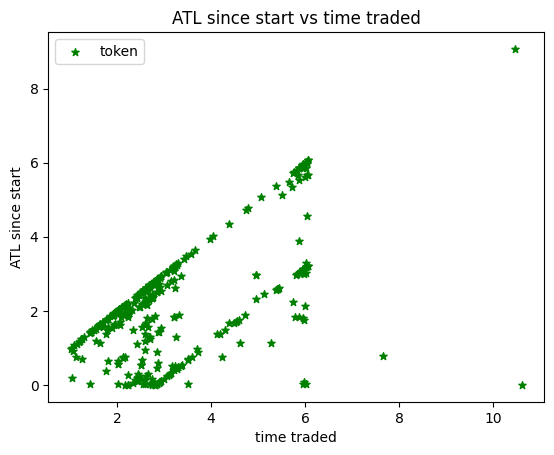

In [273]:
import matplotlib.pyplot as plt 
  
# x-axis values 
x = [pair[2] for pair in pairs_all_time_low_since_start]
# y-axis values 
y = [pair[1] for pair in pairs_all_time_low_since_start]
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "token", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('time traded') 
# frequency label 
plt.ylabel('ATL since start') 
# plot title 
plt.title('ATL since start vs time traded') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [276]:
pairs_all_time_low_since_start

[['1INCH_USDT', 2.8383561643835615, 2.8575342465753426],
 ['AAVE_USDT', 2.684931506849315, 3.0684931506849313],
 ['ABBC_USDT', 2.9342465753424656, 2.9342465753424656],
 ['ACA_USDT', 1.3616438356164384, 1.7643835616438357],
 ['ACH_USDT', 0.5945205479452055, 2.8767123287671232],
 ['ADA_USDT', 1.841095890410959, 5.868493150684931],
 ['AERGO_USDT', 0.30684931506849317, 2.665753424657534],
 ['AGLD_USDT', 0.7671232876712328, 2.1671232876712327],
 ['AKT_USDT', 2.147945205479452, 2.6465753424657534],
 ['ALGO_USDT', 4.353424657534247, 4.372602739726028],
 ['ALICE_USDT', 2.589041095890411, 2.627397260273973],
 ['ALPHA_USDT', 2.8, 2.819178082191781],
 ['AMPL_USDT', 1.284931506849315, 3.26027397260274],
 ['AMP_USDT', 2.684931506849315, 2.7041095890410958],
 ['ANKR_USDT', 0.019178082191780823, 3.5095890410958903],
 ['ANT_USDT', 1.821917808219178, 3.221917808219178],
 ['AOG_USDT', 1.7452054794520548, 1.7643835616438357],
 ['APE_USDT', 1.5917808219178082, 1.63013698630137],
 ['API3_USDT', 2.646575342

In [289]:
count_by_time = {'10% trade time span': 0, \
                 '20% trade time span': 0, \
                 '30% trade time span': 0, \
                 '40% trade time span': 0, \
                 '50% trade time span': 0, \
                 '60% trade time span': 0, \
                '70% trade time span': 0,\
                '80% trade time span': 0,\
                '90% trade time span': 0,\
                '100% trade time span': 0,}
for atl_time in pairs_all_time_low_since_start:
        all_time_low_time_span = atl_time[1]/atl_time[2]

        if all_time_low_time_span <= 0.1:
            count_by_time['10% trade time span'] += 1
        if all_time_low_time_span <= 0.2:
            count_by_time['20% trade time span'] += 1
        if all_time_low_time_span <= 0.1:
            count_by_time['30% trade time span'] += 1
        if all_time_low_time_span <= 0.3:
            count_by_time['40% trade time span'] += 1
        if all_time_low_time_span <= 0.4:
            count_by_time['50% trade time span'] += 1
        if all_time_low_time_span <= 0.5:
            count_by_time['60% trade time span'] += 1
        if all_time_low_time_span <= 0.6:
            count_by_time['70% trade time span'] += 1
        if all_time_low_time_span <= 0.7:
            count_by_time['80% trade time span'] += 1
        if all_time_low_time_span <= 0.8:
            count_by_time['90% trade time span'] += 1
        else:
            count_by_time['100% trade time span'] += 1            
print(count_by_time)

{'10% trade time span': 39, '20% trade time span': 58, '30% trade time span': 39, '40% trade time span': 71, '50% trade time span': 92, '60% trade time span': 108, '70% trade time span': 127, '80% trade time span': 139, '90% trade time span': 143, '100% trade time span': 207}


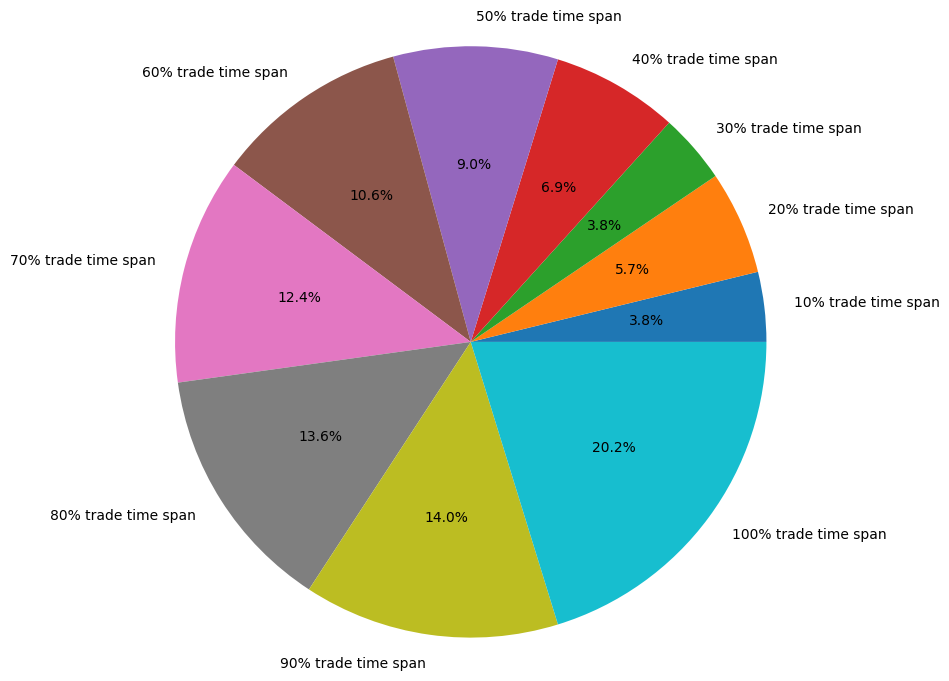

In [290]:
import matplotlib.pyplot as plt 
  
# defining labels 
time_spans = count_by_time.keys()
  
# portion covered by each label 
slices = [count_by_time[time_span] for time_span in  time_spans]
  
# color for each label 
  
# plotting the pie chart 
plt.pie(slices, labels = time_spans,
        radius = 2, autopct = '%1.1f%%') 
  
# showing the plot 
plt.show() 

In [291]:
pairs_all_time_low_since_start = [[pair, (int(alt_btc_rates_analysis[pair]['all_time_low_rate'][0]) - int(alt_btc_rates_analysis[pair]['start_rate'][0]))/(365*3600*24), \
                                   alt_btc_rates_analysis[pair]['time_traded']/(365*3600*24)]\
                                   for pair in alt_btc_rates_analysis if alt_btc_rates_analysis[pair]['time_traded'] > 365*24*3600]

In [292]:
count_by_time = {'1month': 0, '1year': 0, '2years': 0, '3years': 0, '4years': 0, '>4years':0}
for alh_time in pairs_all_time_low_since_start:
    if alh_time[2] >= 2:
        if alh_time[1] <= 1/12:
            count_by_time['1month'] += 1
        elif  alh_time[1] <= 1:
            count_by_time['1year'] += 1
        elif  alh_time[1] <= 2:
            count_by_time['2years'] += 1        
        elif  alh_time[1] <= 3:
            count_by_time['3years'] += 1    
        elif  alh_time[1] <= 4:
            count_by_time['4years'] += 1 
        else:
            count_by_time['>4years'] += 1 
print(count_by_time)

{'1month': 24, '1year': 47, '2years': 46, '3years': 107, '4years': 33, '>4years': 32}


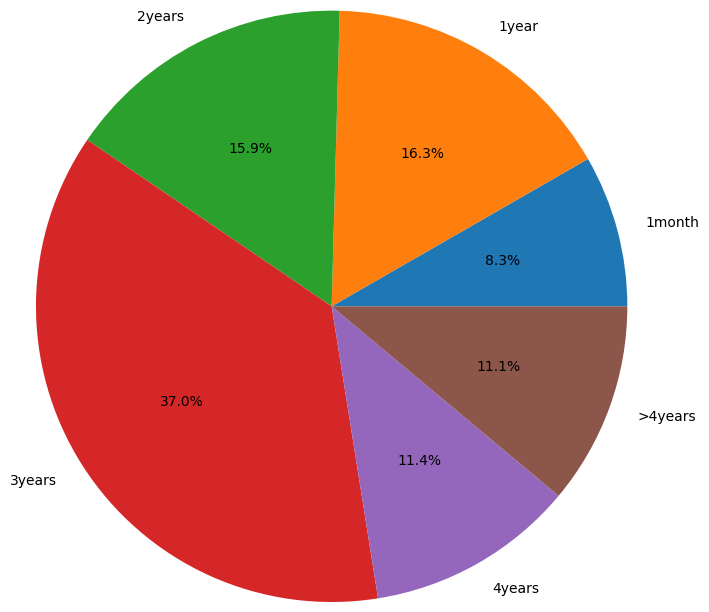

In [306]:
import matplotlib.pyplot as plt 
  
# defining labels 
time_spans = ['1month', '1year', '2years', '3years', '4years', '>4years'] 
  
# portion covered by each label 
slices = [count_by_time[time_span] for time_span in  time_spans]
  
# color for each label 
  
# plotting the pie chart 
plt.pie(slices, labels = time_spans,
        radius = 2, autopct = '%1.1f%%') 
  
# showing the plot 
plt.show() 

In [317]:
pairs_all_time_low_from_current= [[pair, alt_btc_rates_analysis[pair]['all_time_low_from_current']/(365*3600*24), \
                                   alt_btc_rates_analysis[pair]['time_traded']/(365*3600*24)]\
                                   for pair in alt_btc_rates_analysis if alt_btc_rates_analysis[pair]['time_traded'] > 4*365*24*3600]

In [326]:
pairs_all_time_low_from_current

[['ADA_USDT', 4.027397260273973, 5.868493150684931],
 ['ALGO_USDT', 0.019178082191780823, 4.372602739726028],
 ['ARPA_USDT', 2.819178082191781, 4.295890410958904],
 ['ATOM_USDT', 2.819178082191781, 4.526027397260274],
 ['BAT_USDT', 0.0, 6.021917808219178],
 ['BCH_USDT', 0.40273972602739727, 6.06027397260274],
 ['BLZ_USDT', 3.4904109589041097, 5.734246575342466],
 ['BNB_USDT', 2.819178082191781, 5.389041095890411],
 ['BNT_USDT', 0.11506849315068493, 5.964383561643835],
 ['BTC_USDT', 10.605479452054794, 10.605479452054794],
 ['BTG_USDT', 2.8383561643835615, 6.021917808219178],
 ['BTM_USDT', 1.4767123287671233, 6.041095890410959],
 ['BTT_USDT', 0.019178082191780823, 4.736986301369863],
 ['BXC_USDT', 2.665753424657534, 5.120547945205479],
 ['CELR_USDT', 2.8383561643835615, 4.602739726027397],
 ['CRO_USDT', 2.7424657534246575, 4.123287671232877],
 ['CVC_USDT', 3.010958904109589, 6.021917808219178],
 ['DAI_USDT', 1.9753424657534246, 5.868493150684931],
 ['DASH_USDT', 0.0, 6.06027397260274],


In [320]:
count_by_time = {'1month': 0, '1year': 0, '2years': 0, '3years': 0, '4years': 0, '>4years':0}
for alh_time in pairs_all_time_low_from_current:
    if alh_time[2] >= 2:
        if alh_time[1] <= 1/12:
            count_by_time['1month'] += 1
        elif  alh_time[1] <= 1:
            count_by_time['1year'] += 1
        elif  alh_time[1] <= 2:
            count_by_time['2years'] += 1        
        elif  alh_time[1] <= 3:
            count_by_time['3years'] += 1    
        elif  alh_time[1] <= 4:
            count_by_time['4years'] += 1 
        else:
            count_by_time['>4years'] += 1 
print(count_by_time)

{'1month': 20, '1year': 10, '2years': 5, '3years': 28, '4years': 6, '>4years': 9}


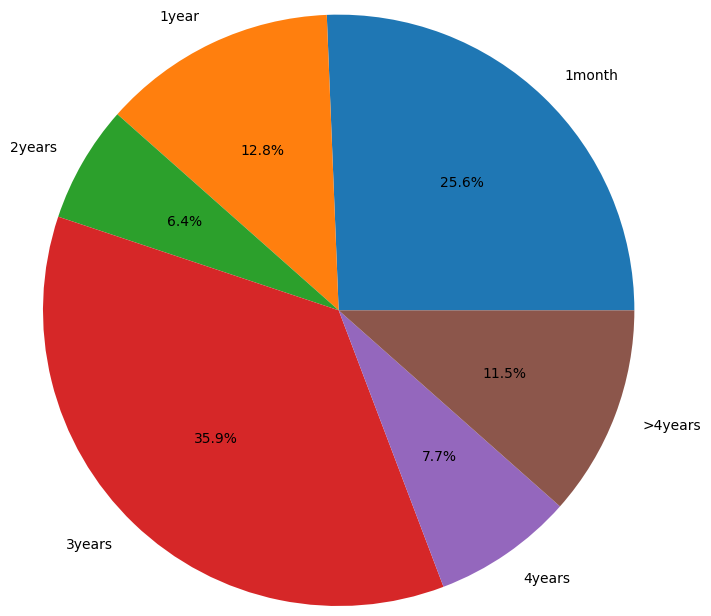

In [321]:
import matplotlib.pyplot as plt 
  
# defining labels 
time_spans = ['1month', '1year', '2years', '3years', '4years', '>4years'] 
  
# portion covered by each label 
slices = [count_by_time[time_span] for time_span in  time_spans]
  
# color for each label 
  
# plotting the pie chart 
plt.pie(slices, labels = time_spans,
        radius = 2, autopct = '%1.1f%%') 
  
# showing the plot 
plt.show() 

In [330]:
[pair[0].split('_')[0] for pair in pairs_all_time_low_from_current if pair[1]>4]

['ADA', 'BTC', 'DOGE', 'ETH', 'KNC', 'LINK', 'RLC', 'TRX', 'VET']

In [336]:
no_atl = [pair for pair in pairs_all_time_low_from_current if pair[1]>4]

In [342]:
no_atl

[['ADA_USDT', 4.027397260273973, 5.868493150684931],
 ['DOGE_USDT', 6.002739726027397, 6.021917808219178],
 ['ETH_USDT', 6.865753424657535, 7.652054794520548],
 ['KNC_USDT', 4.238356164383561, 5.983561643835617],
 ['LINK_USDT', 5.906849315068493, 5.983561643835617],
 ['RLC_USDT', 4.161643835616438, 5.964383561643835],
 ['TRX_USDT', 5.926027397260274, 5.964383561643835],
 ['VET_USDT', 4.142465753424657, 5.273972602739726]]

In [341]:
sum([pair[1] for pair in no_atl])/len(no_atl)

5.1589041095890416

In [343]:
print(datetime.fromtimestamp(int(time.time() - 3600*24*365*5.1589041095890416)))

2018-09-07 23:52:43
